In [170]:
import pandas as pd
import altair as alt

In [171]:
df = pd.read_csv("./_data/sales.csv")

In [172]:
pwest = df[df.building_name == 'Promenade West']

## Promenade West

### Most recent sales

In [173]:
pwest.sort_values("date", ascending=False)[[
    'building_name',
    'date',
    'unit',
    'price',
    'square_feet',
    'price_per_square_foot'
]].head(5)

,building_name,date,unit,price,square_feet,price_per_square_foot
589,Promenade West,2018-06-12,527,600000.0,1323.0,453.514739
590,Promenade West,2018-04-11,706,598000.0,1348.0,443.620178
591,Promenade West,2018-02-01,409,590000.0,1323.0,445.956160
592,Promenade West,2018-01-24,315,615000.0,1509.0,407.554672
593,Promenade West,2017-12-13,804,455000.0,1006.0,452.286282


### The pace of sales

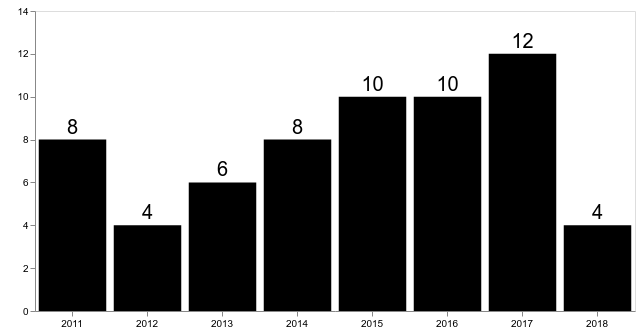

In [174]:
bars = alt.Chart(pwest).mark_bar(color="black").encode(
    x=alt.X("date:O", timeUnit="year", axis=alt.Axis(labelAngle=0, title="")),
    y=alt.Y("count()", scale=alt.Scale(domain=(0, 14)), axis=alt.Axis(title="", grid=False))
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-12,
    size=20
).encode(
    text='count()'
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/sales-by-year.svg')

chart

### Prices by date

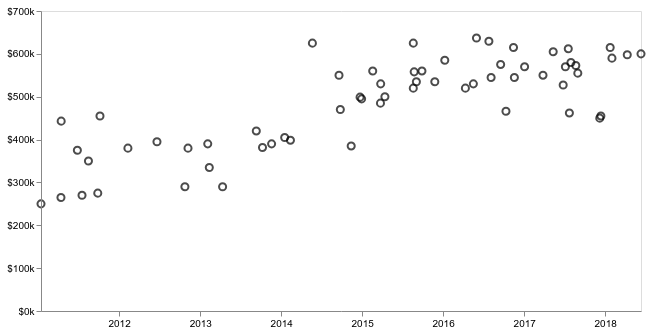

In [175]:
chart = alt.Chart(pwest).mark_point(size=50, color="black").encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 700000])
    ),
    tooltip=["unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

chart.configure_view(
    strokeOpacity=0
).save('assets/price-by-date.svg')

chart

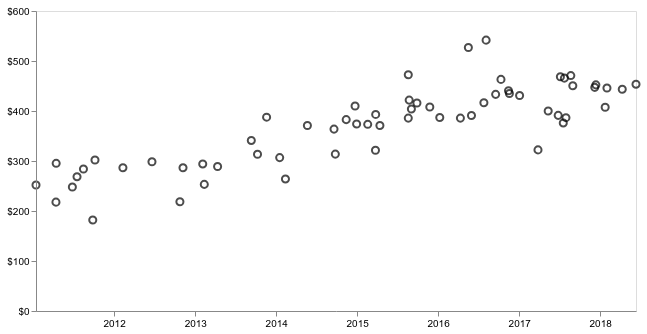

In [176]:
chart = alt.Chart(pwest).mark_point(size=50, color="black").encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price_per_square_foot:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 600])
    ),
    tooltip=["unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

chart.configure_view(
    strokeOpacity=0
).save('assets/price-per-sqft-by-date.svg')

chart

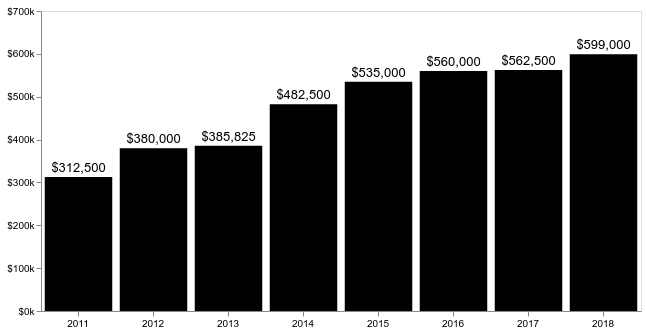

In [177]:
bars = alt.Chart(pwest).mark_bar(color="black").encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 700000]),
    ),
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-9,
    size=13
).encode(
    text=alt.Text('median(price):Q', format="$,.0f")
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/price-by-year.svg')

chart

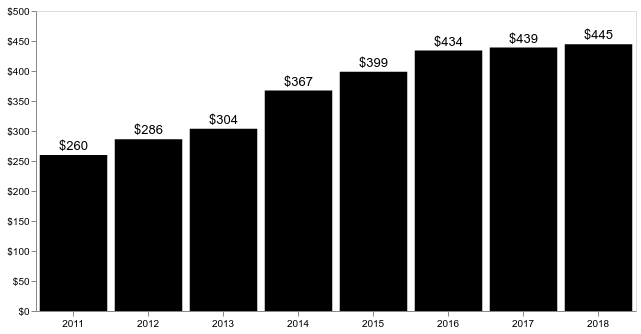

In [178]:
bars = alt.Chart(pwest).mark_bar(color="black").encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price_per_square_foot):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 500]),
    ),
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-9,
    size=13
).encode(
    text=alt.Text('median(price_per_square_foot):Q', format="$,.0f")
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/price-per-sqft-by-year.svg')

chart

## Bunker Hill

In [179]:
bunker_hill = df[df.region == 'Bunker Hill']

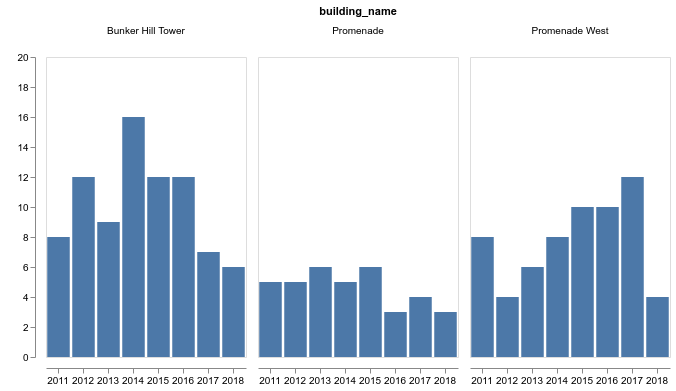

In [180]:
chart = alt.Chart(bunker_hill).mark_bar().encode(
    x=alt.X("date:O", timeUnit="year", axis=alt.Axis(labelAngle=0, title="")),
    y=alt.Y("count()", scale=alt.Scale(domain=(0, 20)), axis=alt.Axis(title="", grid=False)),
    column="building_name:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/sales-by-year.svg')

chart

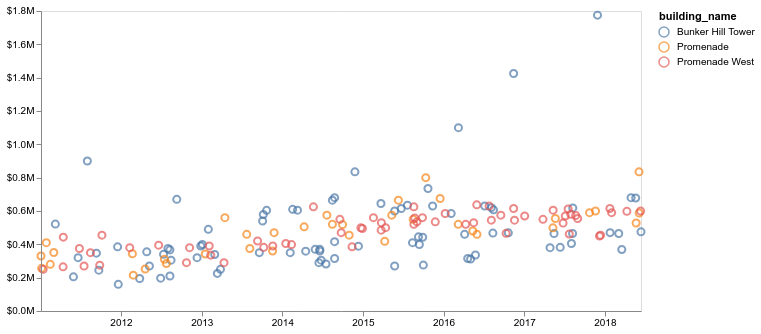

In [181]:
chart = alt.Chart(bunker_hill).mark_point(size=50).encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    color="building_name",
    tooltip=["building_name", "unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-date.svg')

chart

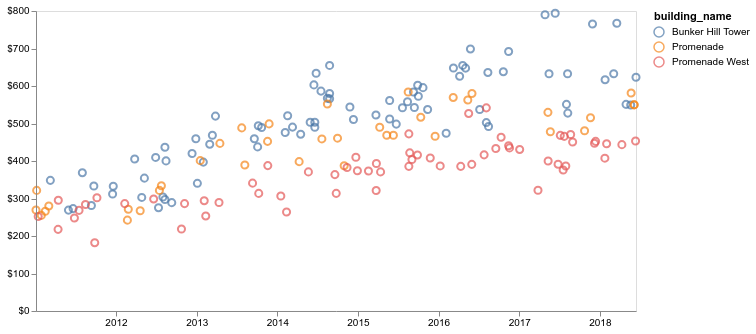

In [182]:
chart = alt.Chart(bunker_hill).mark_point(size=50).encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price_per_square_foot:Q",
        axis=alt.Axis(title="", format="$s", grid=False)
    ),
    color="building_name:N",
    tooltip=["building_name", "unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-per-sqft-by-date.svg')

chart

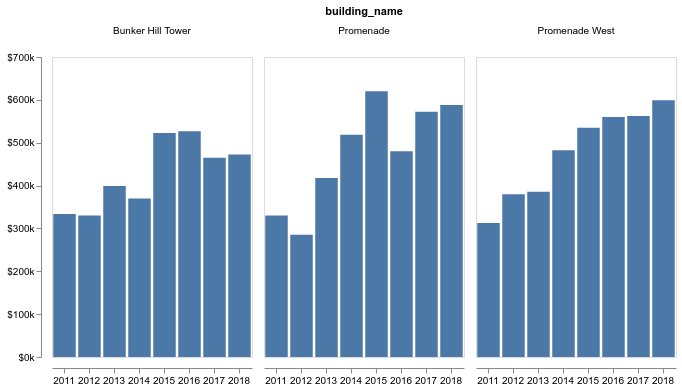

In [183]:
chart = alt.Chart(bunker_hill).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 700000]),
    ),
    column="building_name:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

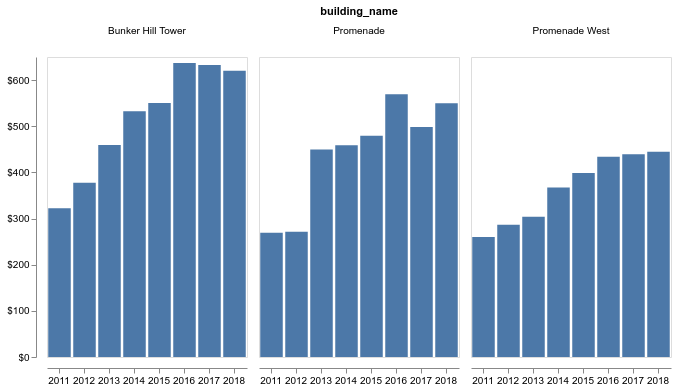

In [184]:
chart = alt.Chart(bunker_hill).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price_per_square_foot):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    column="building_name:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

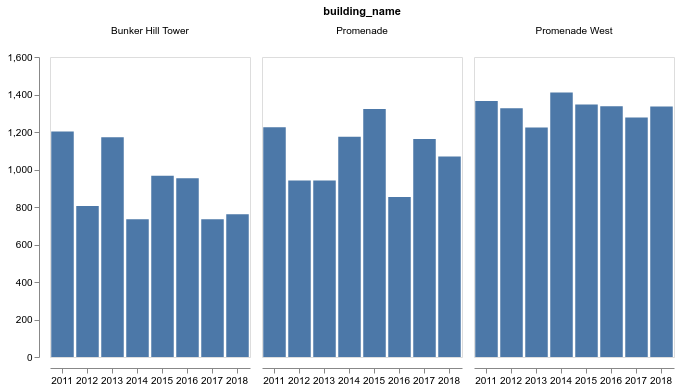

In [185]:
chart = alt.Chart(bunker_hill).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(square_feet):Q",
        axis=alt.Axis(title="", grid=False),
    ),
    column="building_name:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

## Region

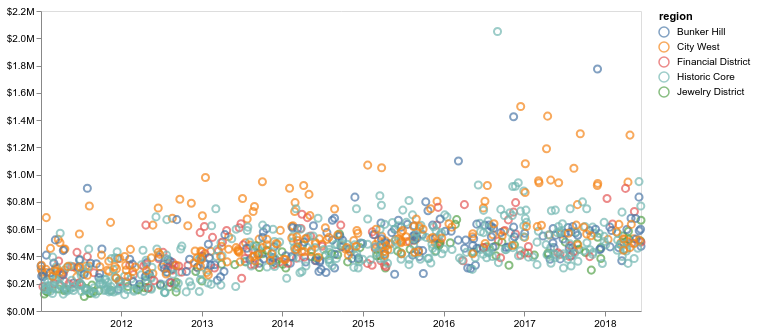

In [186]:
chart = alt.Chart(df).mark_point(size=50).encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    color="region",
    tooltip=["region", "building_name", "unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-date.svg')

chart

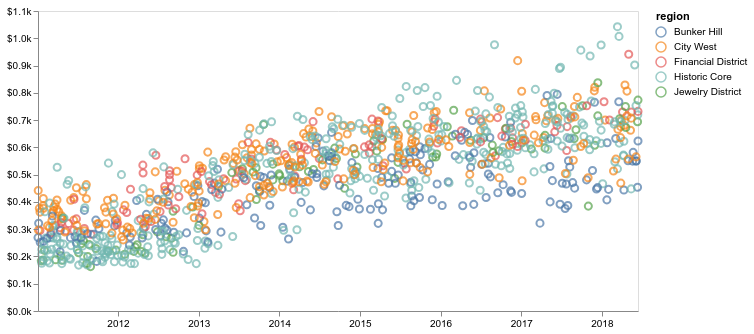

In [187]:
chart = alt.Chart(df).mark_point(size=50).encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price_per_square_foot:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    color="region",
    tooltip=["region", "building_name", "unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-date.svg')

chart

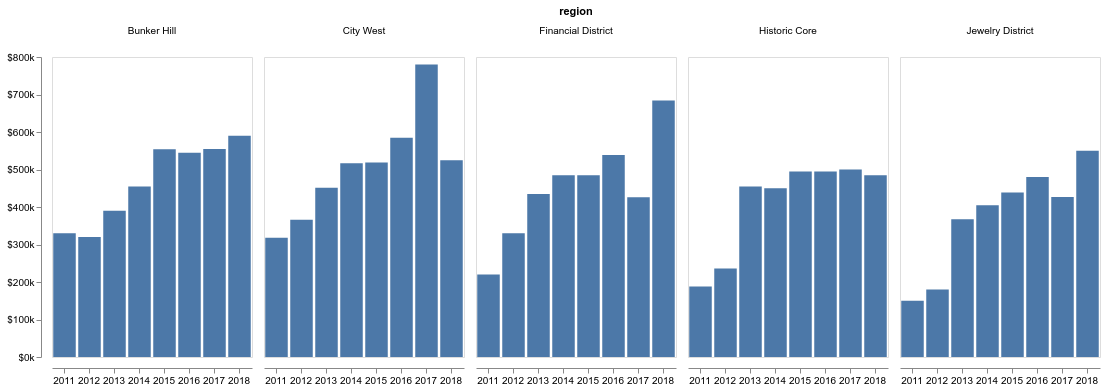

In [188]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    column="region:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

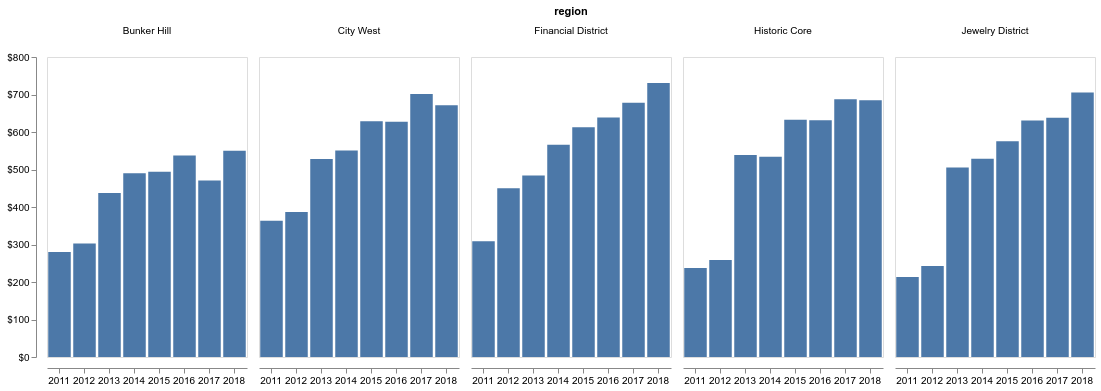

In [189]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price_per_square_foot):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    column="region:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

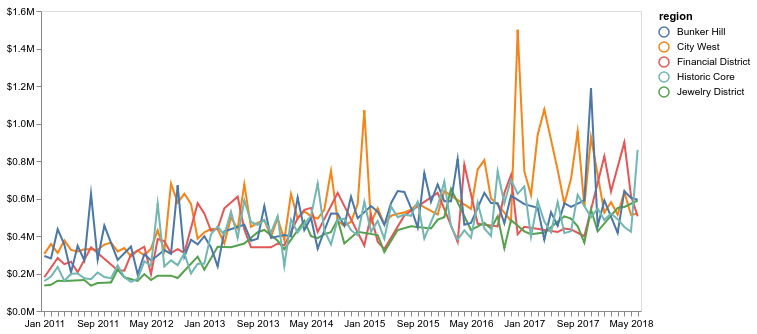

In [190]:
chart = alt.Chart(df).mark_line().encode(
    x=alt.X(
        "date:O",
        timeUnit="yearmonth",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    color="region:N"
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

## Rankings

In [191]:
building_ranking = df.groupby(["building_name", "region"]).agg({
    "unit": "count",
    "price": "median",
    "price_per_square_foot": "median",
    "square_feet": "median",
})

In [192]:
building_ranking.sort_values("price_per_square_foot", ascending=False)

,,price,square_feet,unit,price_per_square_foot
building_name,region,,,,
The Rowan,Historic Core,505888.0,820.0,95,672.839506
Douglas,Historic Core,465000.0,950.0,31,629.729730
El Dorado,Historic Core,675000.0,1020.0,25,624.358974
110 Wilshire,City West,524000.0,820.0,131,612.790698
655 Hope,Financial District,501999.5,930.0,48,564.133987
Bartlett,Jewelry District,387000.0,740.0,90,520.202899
Bunker Hill Tower,Bunker Hill,402000.0,762.0,82,520.114168
Library Court,Financial District,369000.0,680.0,53,513.333333
Vero,City West,450000.0,995.0,118,486.435288


In [193]:
region_ranking = df.groupby(["region"]).agg({
    "unit": "count",
    "price": "median",
    "price_per_square_foot": "median",
    "square_feet": "median",
})

In [194]:
region_ranking.sort_values("price_per_square_foot", ascending=False)

,price,square_feet,unit,price_per_square_foot
region,,,,
City West,495000.0,920.0,249,542.168675
Historic Core,415500.0,820.0,350,535.346855
Financial District,410000.0,740.0,101,534.804754
Jewelry District,387000.0,740.0,90,520.202899
Bunker Hill,465000.0,1172.0,181,450.487013
